In [2]:
import pandas as pd
import numpy as np

#Read the data and parse dates
en_df = pd.read_parquet('../data/sample/sample_en_parquet/', engine='pyarrow')
fr_df = pd.read_parquet('../data/sample/sample_fr_parquet/', engine='pyarrow')

#Convert the date column to datetime
en_df['created_at'] = pd.to_datetime(en_df['created_at'])
fr_df['created_at'] = pd.to_datetime(fr_df['created_at'])


In [2]:
en_df.head()

,id,author_id,created_at,retweet_count,reply_count,like_count,quote_count,impression_count,followers_count
0,1633111775397699585,1421990603278061569,2023-03-07 14:26:03+00:00,4644,0,0,0,0,11
1,1633111775406071808,1266246492529913856,2023-03-07 14:26:03+00:00,245,0,0,0,0,102
2,1633111775389310976,1516399872173383680,2023-03-07 14:26:03+00:00,121,0,0,0,0,67
3,1633111775397683207,1587894925420544002,2023-03-07 14:26:03+00:00,0,0,0,0,0,0
4,1633111775380996096,535586776,2023-03-07 14:26:03+00:00,413,0,0,0,0,418


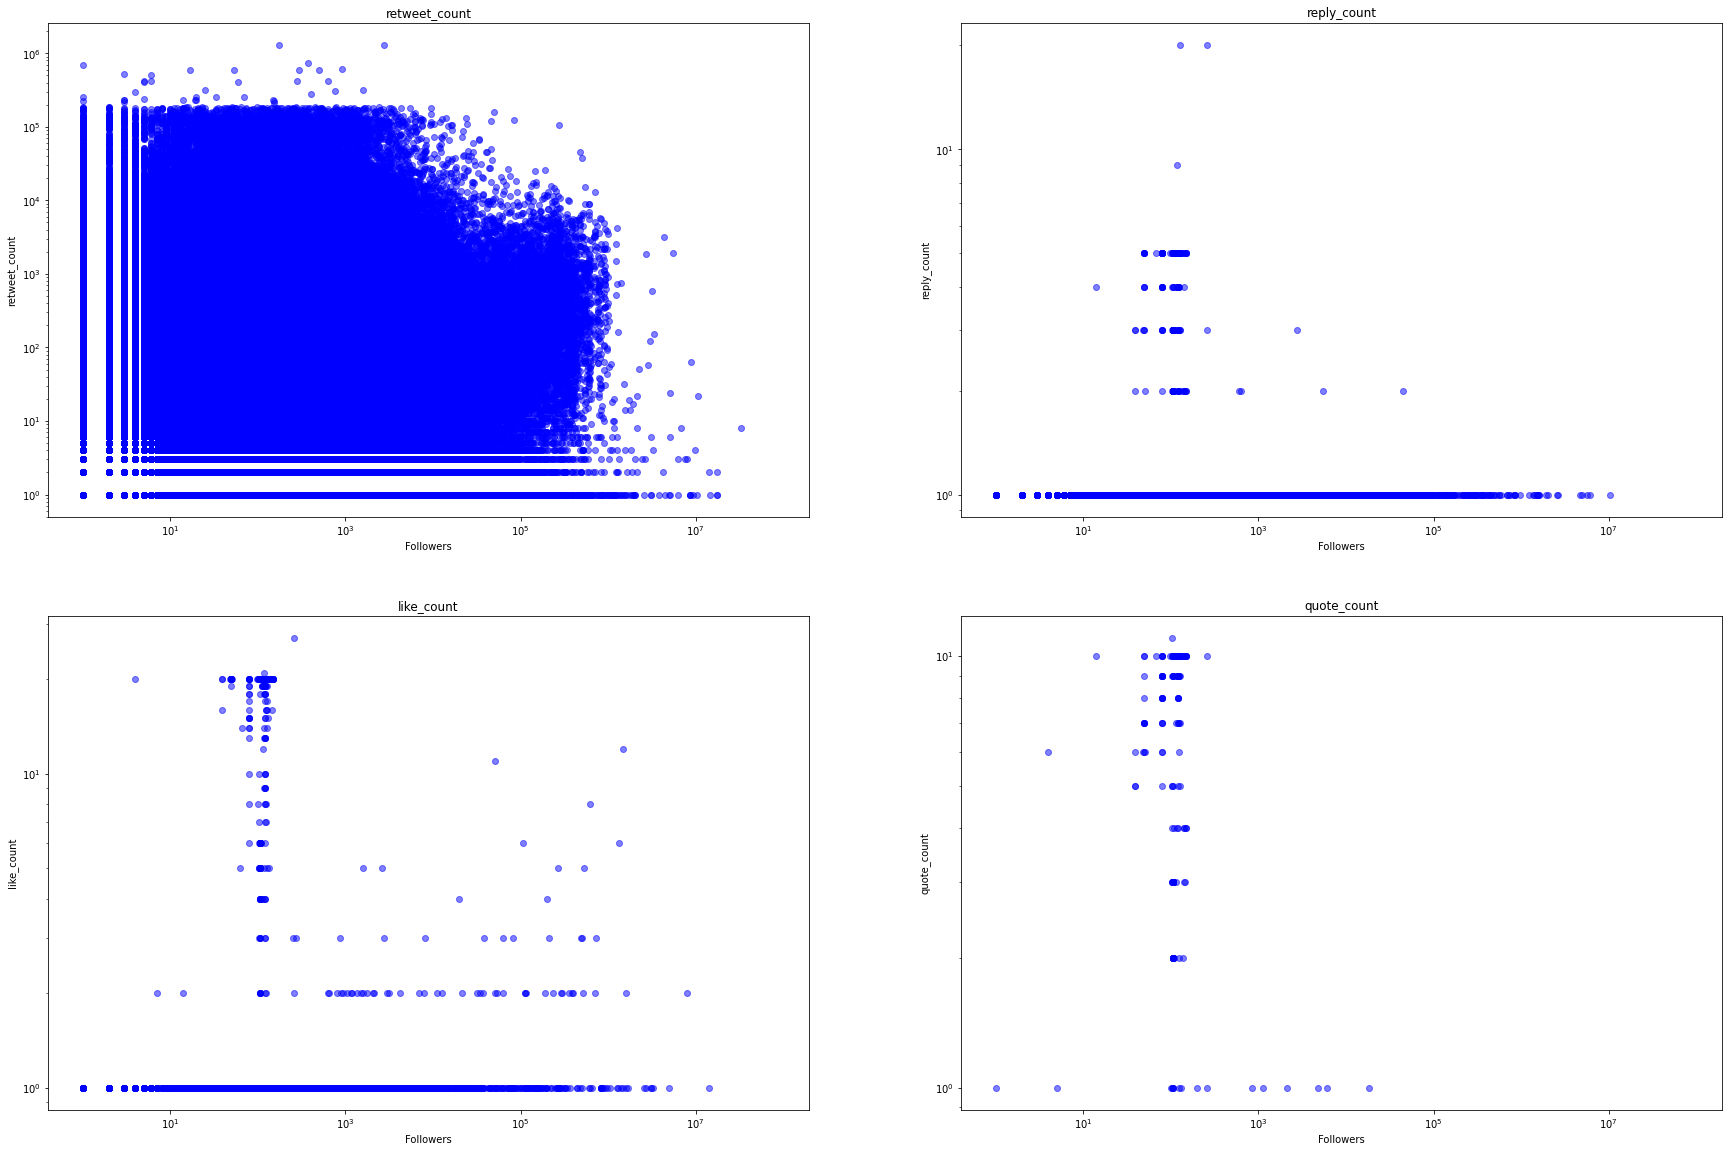

In [3]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2,2, figsize=(30,20))
columns = ['retweet_count', 'like_count', 'reply_count', 'quote_count']

en_df_sorted = en_df.sort_values(by='followers_count')

for i,col in enumerate(columns):
    coords = (i % 2, i // 2)
    ax[coords].scatter(en_df['followers_count'], en_df[col], alpha=0.5, color='blue')
    ax[coords].set_title(col)
    ax[coords].set_xlabel('Followers')
    ax[coords].set_ylabel(col)
    ax[coords].set_yscale('log')
    ax[coords].set_xscale('log')






In [4]:
# Create a joint plot showing the relationship between the number of followers and the number of retweets
import seaborn as sns
sns.set(style="white", color_codes=True)
sns.jointplot(x="followers_count", y="retweet_count",
              data=en_df, kind="reg", color="b", height=10)


: 

: 

In [ ]:
fr_df

,id,author_id,created_at,retweet_count,reply_count,like_count,quote_count,impression_count,followers_count
0,1633111775393509381,1305923782608138243,2023-03-07 14:26:03+00:00,0,0,0,0,0,40
1,1633111783773700108,1375800129857404932,2023-03-07 14:26:05+00:00,0,0,0,0,0,183
2,1633111783769513990,706072306523705344,2023-03-07 14:26:05+00:00,0,0,0,0,0,555
3,1633111783777923072,1174722596023259137,2023-03-07 14:26:05+00:00,0,0,0,0,0,1616
4,1633111792191778817,1601082532723826688,2023-03-07 14:26:07+00:00,46,0,0,0,0,76
...,...,...,...,...,...,...,...,...,...
46678,1634141393131118594,1475374046107901957,2023-03-10 10:37:23+00:00,50,0,0,0,0,2
46679,1634141405743292417,765902931665313792,2023-03-10 10:37:26+00:00,454,0,0,0,0,52
46680,1634141405730820096,1669980331,2023-03-10 10:37:26+00:00,0,0,0,0,0,316
46681,1634141418309529600,488752267,2023-03-10 10:37:29+00:00,4618,0,0,0,0,698


In [6]:
american_politicians_df = pd.read_parquet('../data/american_politicians/parquet/', engine='pyarrow')
american_politicians_df['created_at'] = pd.to_datetime(
    american_politicians_df['created_at'])


In [7]:
american_politicians_df

,author_id,id,created_at,retweet_count,reply_count,like_count,quote_count,impression_count,followers_count,following_count,tweet_count,listed_count
0,914815520842616834,1629913861737283585,2023-02-26 18:38:41+00:00,0,4,19,0,3446,97107,2211,6854,504
1,914815520842616834,1629913861737283585,2023-02-26 18:38:41+00:00,0,4,19,0,3446,97107,2211,6854,504
2,914815520842616834,1629913861737283585,2023-02-26 18:38:41+00:00,0,4,19,0,3446,97095,2211,6854,504
3,914815520842616834,1629913861737283585,2023-02-26 18:38:41+00:00,0,4,19,0,3446,97095,2211,6854,504
4,914815520842616834,1629304017087090689,2023-02-25 02:15:23+00:00,4,22,165,0,17557,97107,2211,6854,504
...,...,...,...,...,...,...,...,...,...,...,...,...
365597,20217019,1613552020094595073,2023-01-12 15:02:34+00:00,11,29,78,2,14378,166851,2122,26160,1442
365598,20217019,1613552020094595073,2023-01-12 15:02:34+00:00,11,29,78,2,14378,166851,2122,26160,1442
365599,20217019,1613552020094595073,2023-01-12 15:02:34+00:00,11,29,78,2,14378,166849,2122,26160,1442
365600,20217019,1613552020094595073,2023-01-12 15:02:34+00:00,11,29,78,2,14378,166849,2122,26160,1442


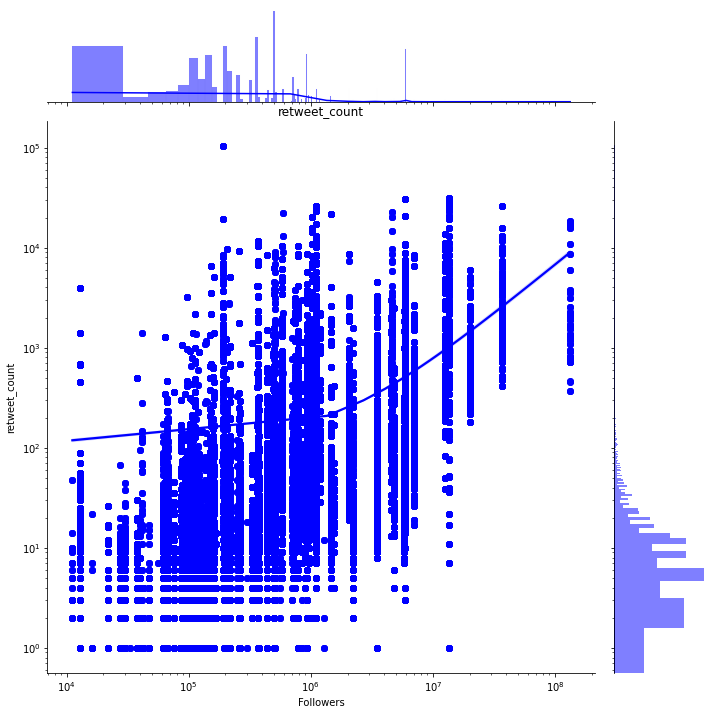

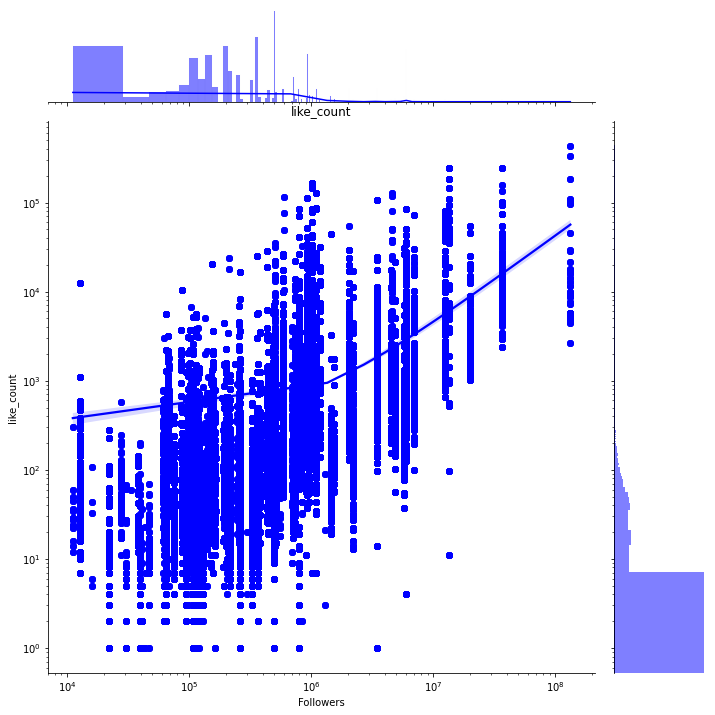

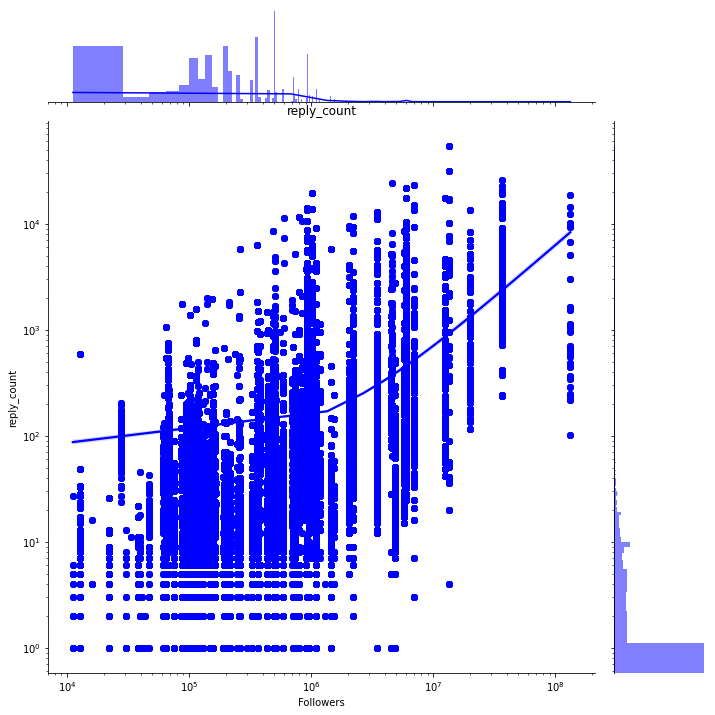

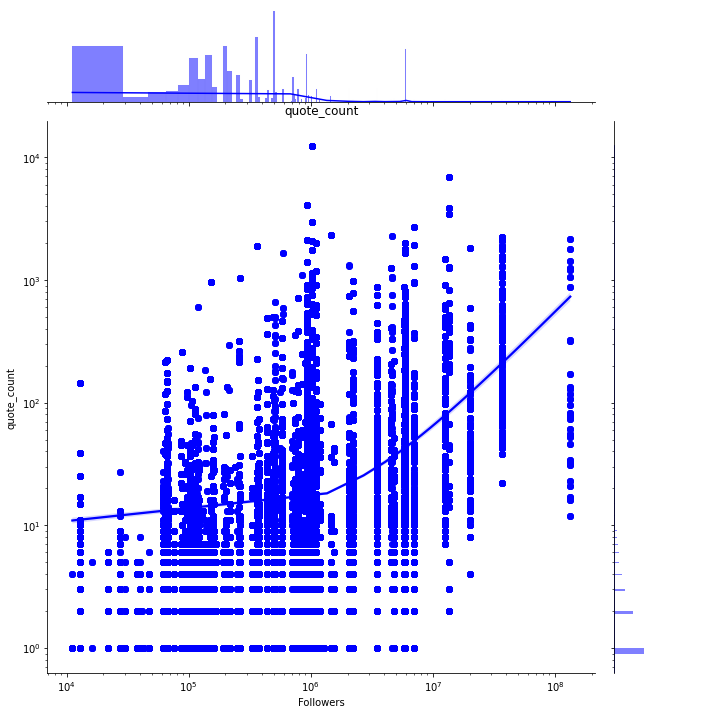

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns


columns = ['retweet_count', 'like_count', 'reply_count', 'quote_count']

for i, col in enumerate(columns):

    # do a joint plot here
    sns.jointplot(x="followers_count", y=col,
                    data=american_politicians_df, kind="reg", color="b", height=10)
    plt.xscale('log')
    plt.yscale('log')
    plt.title(col)
    plt.xlabel('Followers')
    plt.ylabel(col)

    plt.show()



TypeError: regplot() got an unexpected keyword argument 'logy'

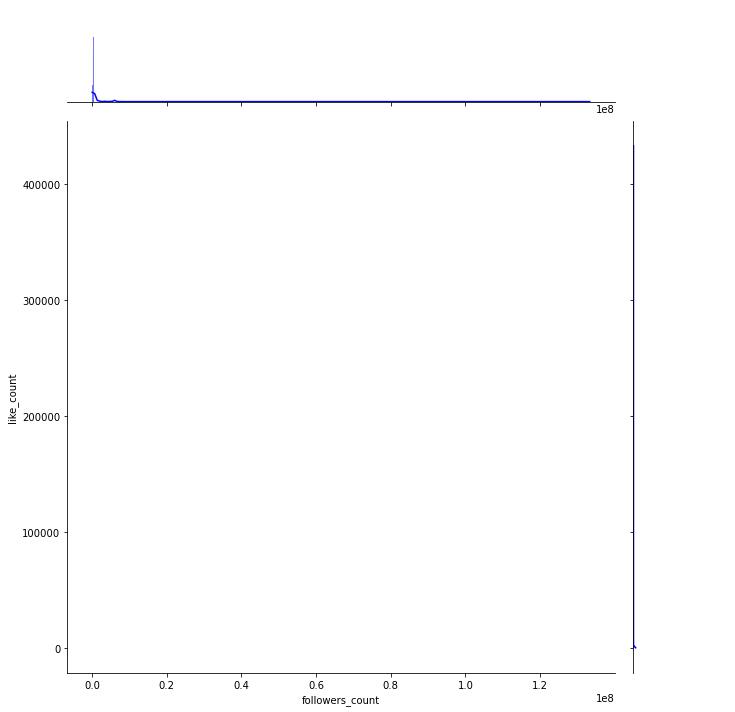

In [15]:
sns.jointplot(x="followers_count", y='like_count',
              data=american_politicians_df, kind="reg", color="b",height=10, logx=True, logy=True)


In [ ]:
sns.jointplot(x="followers_count", y='impression_count',
              data=american_politicians_df, kind="reg", color="b", height=10)
